# Uber Case Study 

The analysis is divided into three main parts:
1. Data Loading
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Exploratory Data Analysis 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
df = pd.read_csv("Uber Request Data.csv")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
# Looking at all the column names
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

## Data Cleaning 

The data provided had various consistency issues and discrepancies. Some of
these are enumerated below:   


• The timestamp's are given, and they aren’t of standard date-time format.

• There are NA values which were treated as a part of our assumptions.   


In [5]:
# make sure that number of duplicate rows are zero
sum(df.duplicated(subset = "Request id")) == 0

True

**let's look at the dimensions of the dataframe**

In [6]:
df.shape

(6745, 6)

**check for NA values in dataset**

In [7]:
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64
True
6564


**checking the % of NAs columnwise**

In [8]:
df.isnull().sum()*100/df.shape[0] 

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

**check for NA values in each columns except "Driver id" and "Drop timestamp" (Cross Verification)**

In [9]:
print (df['Request id'].isnull().values.any()) 
print (df['Request id'].isnull().values.sum())

False
0


In [10]:
print (df['Pickup point'].isnull().values.any())
print (df['Pickup point'].isnull().values.sum())

False
0


In [11]:
print (df['Status'].isnull().values.any())
print (df['Status'].isnull().values.sum())

False
0


In [12]:
print (df['Request timestamp'].isnull().values.any())
print (df['Request timestamp'].isnull().values.sum())

False
0


**convert 'Request timestamp' column to datetime oject**

In [13]:
df["Request timestamp"] = df["Request timestamp"].astype(str)
df['Request timestamp'] = df['Request timestamp'].str.replace("/", "-")
df['Request timestamp'] = pd.to_datetime(df["Request timestamp"], dayfirst=True)

In [14]:
# convert 'Drop timestamp' column to datetime oject
df["Drop timestamp"] = df["Drop timestamp"].astype(str)
df['Drop timestamp'] = df['Drop timestamp'].str.replace("/", "-")
df['Drop timestamp'] = pd.to_datetime(df["Drop timestamp"], dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [16]:
# extract the hour from the request time
req_hour = df["Request timestamp"].dt.hour
req_hour.head()
req_hour.value_counts()
df["req_hour"] = req_hour

In [17]:
#extract the day from the request time
req_day = df["Request timestamp"].dt.day
req_day.head()
req_day.value_counts()
df["req_day"] = req_day

## Exploratory Data Analysis

**Plotting the Bar plots for required hour and required day**

In [18]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='Status', data=df)
    plt.show()


C:\Users\Dinesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


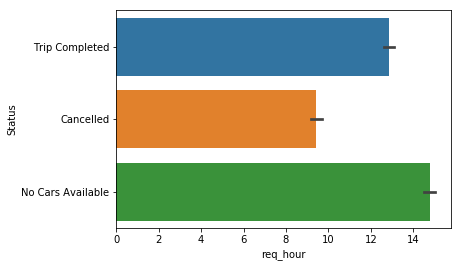

In [19]:
plot_cat("req_hour")

C:\Users\Dinesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


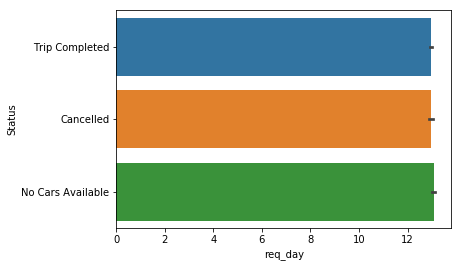

In [23]:
plot_cat("req_day")

**Taking the respective rows into the individual dataframes wrt to the Status**

In [24]:
df_completed=df.loc[df['Status']=='Trip Completed']
df_cancelled=df.loc[df['Status']=='Cancelled']
df_not_available=df.loc[df['Status']=='No Cars Available']



In [25]:
"""import numpy as np
plt.plot(df_completed['Pickup point'],np.zeros_like(df_completed['Pickup point']),'o')
plt.plot(df_cancelled['Pickup point'],np.zeros_like(df_cancelled['Pickup point']),'o')
plt.plot(df_not_available['Pickup point'],np.zeros_like(df_not_available['Pickup point']),'o')
plt.show()"""

"import numpy as np\nplt.plot(df_completed['Pickup point'],np.zeros_like(df_completed['Pickup point']),'o')\nplt.plot(df_cancelled['Pickup point'],np.zeros_like(df_cancelled['Pickup point']),'o')\nplt.plot(df_not_available['Pickup point'],np.zeros_like(df_not_available['Pickup point']),'o')\nplt.show()"

In [26]:
# factor plot of hour and day w.r.t. status
sns.factorplot(x = "req_hour", hue = "Status", row = "req_day", data = df, kind = "count")

In [27]:
# factor plot of hour and day w.r.t. pickup point
sns.factorplot(x = "req_hour", hue = "Pickup point", row = "req_day", data = df, kind = "count")

In [28]:
# aggregate count plot for all days w.r.t. to Pickup point
sns.factorplot(x = "req_hour", hue = "Pickup point", data = df, kind = "count")

In [29]:
# creating a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df.req_hour.apply(lambda x: time_period(x))

In [30]:
df.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

In [31]:
# another way to look at the trips made in each time slot
Pre_Morning = print (df.time_slot[df.time_slot == "Pre_Morning"].value_counts())
Morning_Rush = print (df.time_slot[df.time_slot == "Morning_Rush"].value_counts())
Day_Time = print (df.time_slot[df.time_slot == "Day_Time"].value_counts())
Evening_Rush = print (df.time_slot[df.time_slot == "Evening_Rush"].value_counts())
Late_Night = print (df.time_slot[df.time_slot == "Late_Night"].value_counts())

Pre_Morning    578
Name: time_slot, dtype: int64
Morning_Rush    2103
Name: time_slot, dtype: int64
Day_Time    1224
Name: time_slot, dtype: int64
Evening_Rush    2342
Name: time_slot, dtype: int64
Late_Night    498
Name: time_slot, dtype: int64


## Univariate Analysis


In [49]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.countplot(x = "time_slot", hue = "Status", data = df)

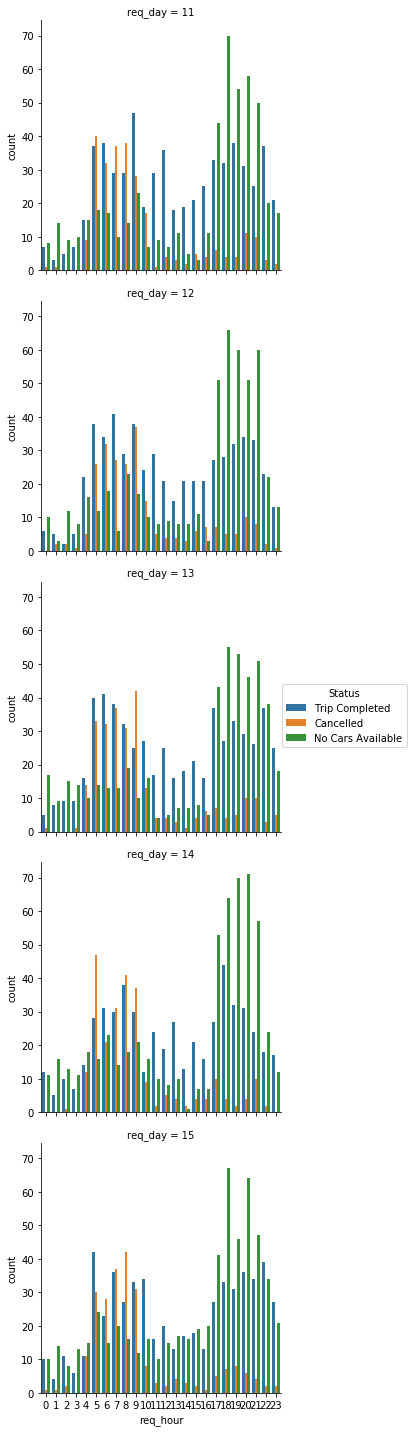

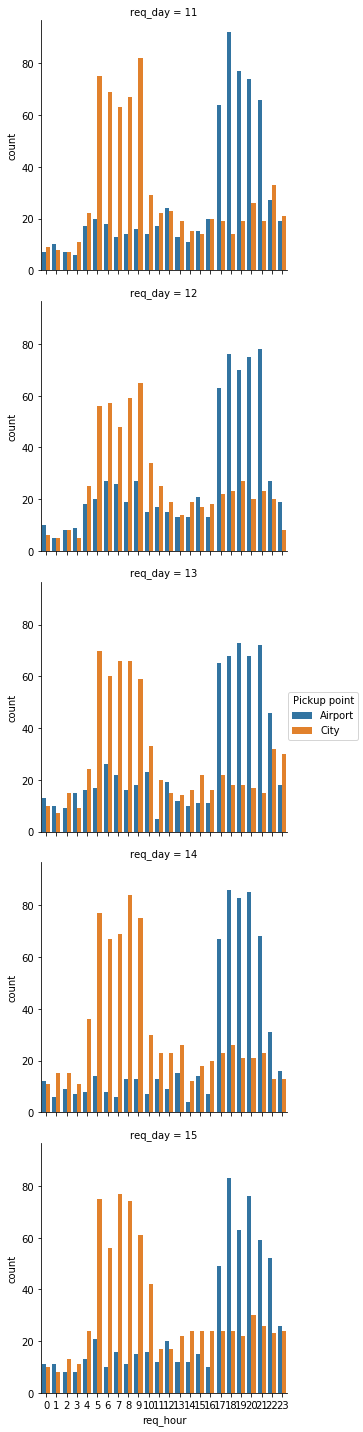

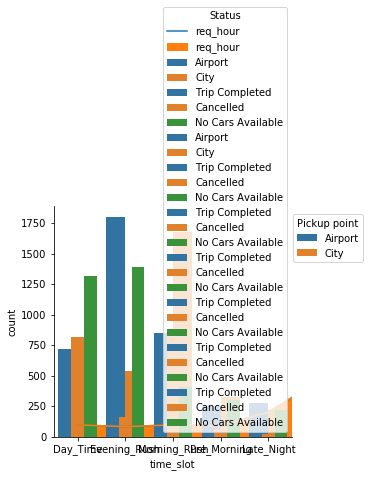

In [50]:
plt.show()

In [33]:
# plot time slot w.r.t. pickuppint and identify the most critical problems before Uber
sns.countplot(x = "time_slot", hue = "Pickup point", data = df)

In [34]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
df_morning_rush = df[df.time_slot == "Morning_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_morning_rush)

In [35]:
# as you can see in the above plot the higest number of cancellations are in the "Day time" time slot
df_day_time = df[df.time_slot == "Day_Time"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_day_time)

In [36]:
# as you can see in the above plot the higest number of cancellations are in the "Late_Night" time slot
df_late_night = df[df.time_slot == "Late_Night"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_late_night)

In [37]:
# as you can see in the above plot the higest number of cancellations are in the "Pre_Morning" time slot
df_Pre_Morning = df[df.time_slot == "Pre_Morning"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_Pre_Morning)

In [38]:
# let's look at the supply and demand in evening rush hour
df_evening_rush = df[df.time_slot == "Evening_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_evening_rush)

In [39]:
# severity of problem by location and their count (cancellation of cab as per the pickup location @Morning Rush)
df_airport_cancelled  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Cancelled")]
len(df_airport_cancelled.index)


23

In [40]:
df_city_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Cancelled")]
len(df_city_cancelled.index)

820

In [41]:
# let's look at the supply and demand in morning rush hour in the city
df_city_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_city_completed_morning_rush.index)

472

In [42]:
df_city_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City")]
len(df_city_morning_rush.index)

1677

In [43]:
# let's look at the supply and demand in morning rush hour at the airport
df_airport_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_airport_completed_morning_rush.index)

382

In [44]:
df_airport_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport")]
len(df_airport_morning_rush.index)

426

*Line charts for req_hour

In [45]:
df['req_hour'].value_counts().sort_index().plot.line()

*Area charts
Area charts are just line charts, but with the bottom shaded in. That's it!

In [46]:
df['req_hour'].value_counts().sort_index().plot.area()

In [48]:
#Let's now analyse how the status varies across continuous variables. :-Plotting univariate distributions
sns.distplot(df['req_hour'])
plt.show()

In [ ]:
#Plotting univariate distributions for req_day
sns.distplot(df['req_day'])
plt.show()

In [ ]:
sns.distplot(df["req_hour"], kde=False, rug = True)

## Segmented Univariate Analysis

C:\Users\Dinesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


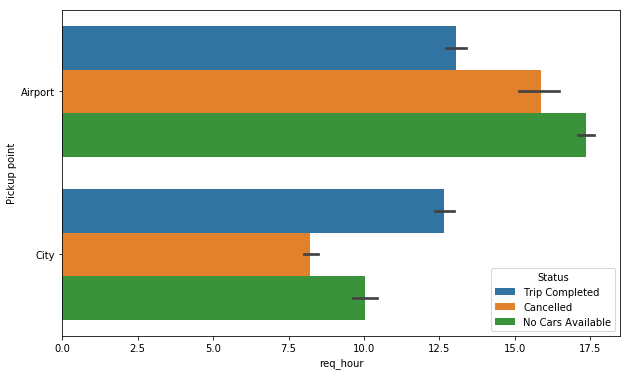

In [51]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='Pickup point', hue='Status', data=df)
    plt.show()

    
plot_segmented('req_hour')

C:\Users\Dinesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


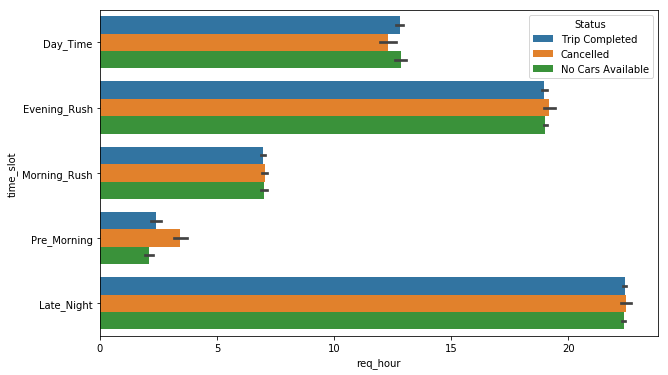

In [61]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='time_slot', hue='Status', data=df)
    plt.show()

    
plot_segmented('req_hour')

## Bivariate Analysis

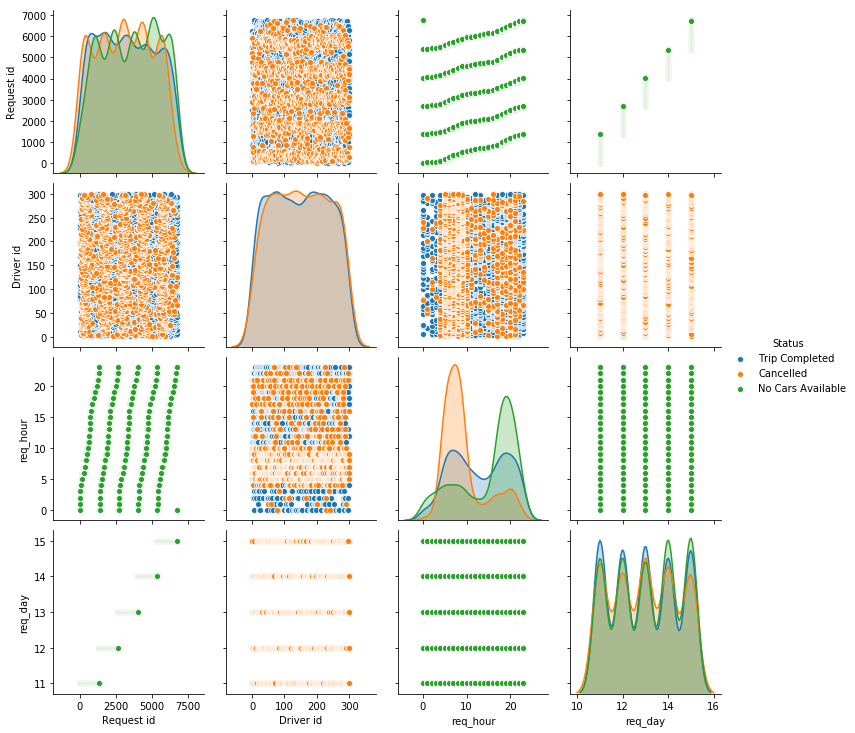

In [222]:
#To plot multiple pairwise bivariate distributions for status 
sns.pairplot(df, hue="Status");

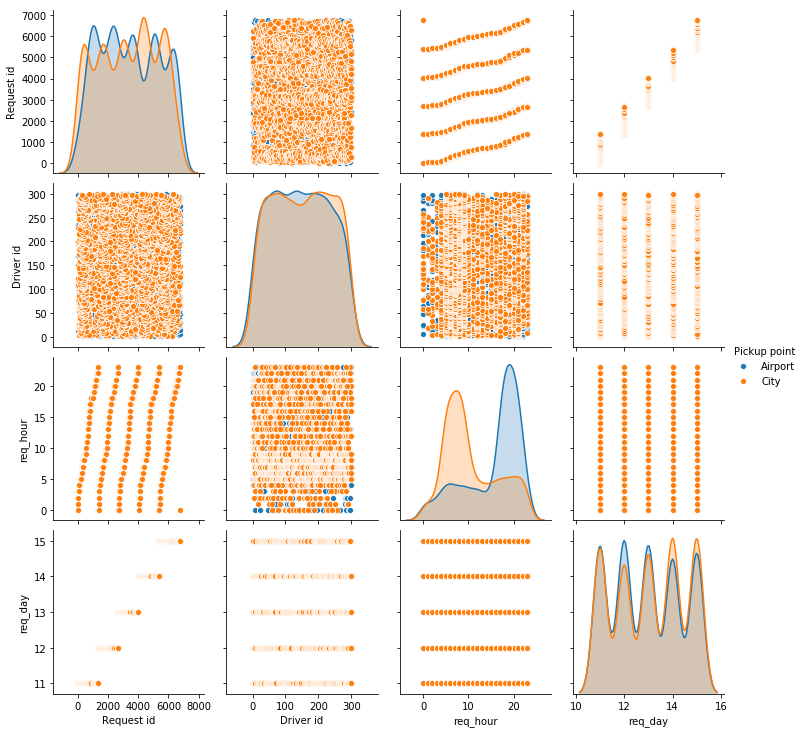

In [223]:
# To plot multiple pairwise bivariate distributions for pikcup point
sns.pairplot(df, hue="Pickup point");

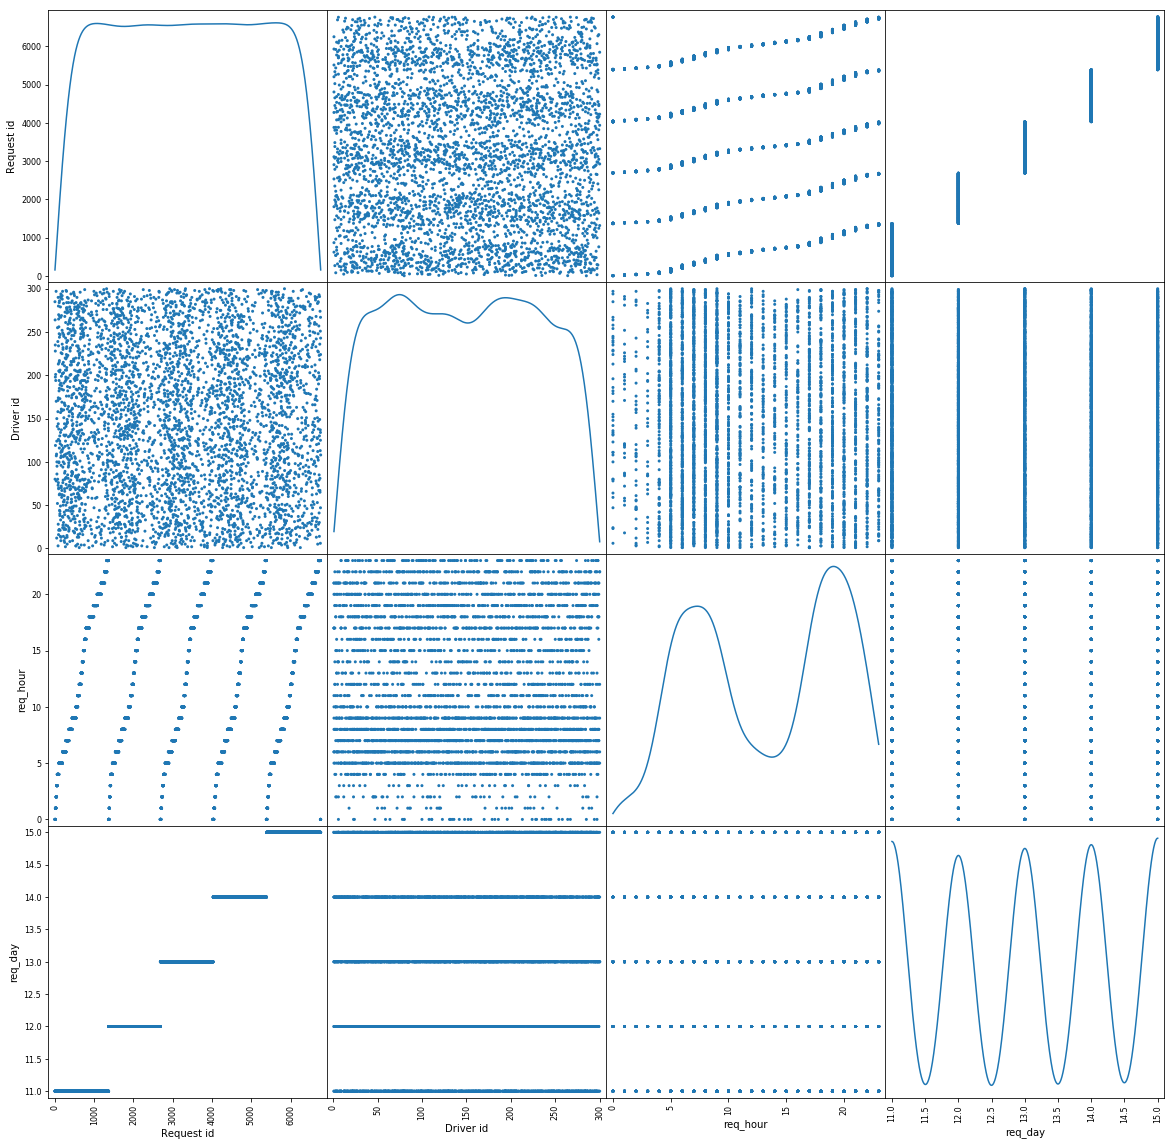

In [213]:
#Multivariate graphical method:-In multivariate graphical methods, we will analyse the entire dataset together. The main component of the multivariate graphical method is probably the scatterplot. Scatter plots are used to visualize the relationship between two different data sets
pd.plotting.scatter_matrix(df, alpha=1.0, figsize=(20, 20), diagonal='kde')
plt.show()

**The heatmap below is created from the correlation matrix of different features in the data set. The correlation matrix generates values from -1 to 1, so creating a heatmap to visualize this correlation is very useful and easy to understand**

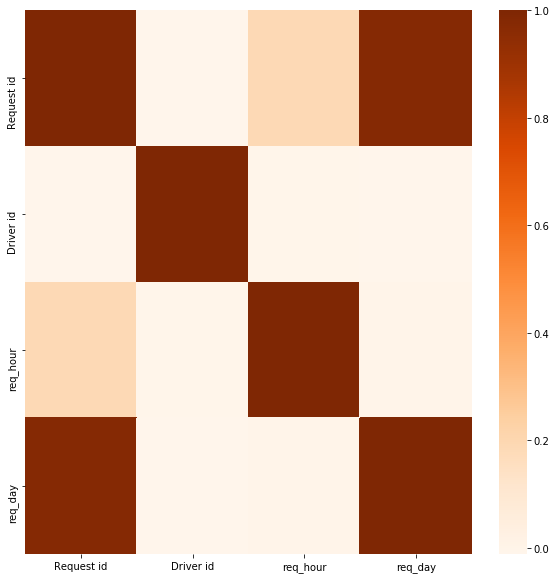

In [214]:
#Plotting the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Oranges',annot=False) 

**A marginal plot allows to study the relationship between 2 numeric variables. The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot. The marginal charts, usually at the top and at the right, show the distribution of the 2 variables using histogram or density plot.**

**The seaborn library provides a joint plot function that is really handy to make this type of graphic. Here we are ploting it wrt to the req_hour and req_day and the center plot is hexbin plot.**

In [30]:
#Plotting Bivariate Distributions
sns.jointplot(x="req_hour", y="req_day", data=df,kind="hex");

C:\Users\Dinesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


**This joint plot is plotting same again wrt to the req_hour and req_day but the marginal charts show the density plots and center plot represent the contour density plot.**

**We can see the joint distribution and the marginal distributions together using sns.jointplot**



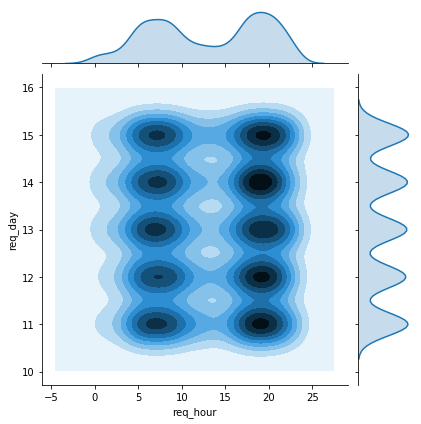

In [241]:
sns.jointplot(x="req_hour", y="req_day", data=df, kind="kde");

In [112]:
# let's look at the supply and demand in evening rush hour in the city
df_city_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_city_completed_evening_rush.index)

411

In [113]:
df_city_evening_rush  = df_evening_rush.loc[(df_evening_rush[" point"] == "City")]
len(df_city_evening_rush.index)

542

In [114]:
# let's look at the supply and demand in evening rush hour from the airport
df_airport_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_airport_completed_evening_rush.index)

373

In [115]:
df_airport_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport")]
len(df_airport_evening_rush.index)

1800

In [116]:
# let's look at the severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening rush
df_airport_cancelled_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Cancelled")]
len(df_airport_cancelled_evening_rush.index)

106

In [117]:
df_city_cancelled_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Cancelled")]
len(df_city_cancelled_evening_rush.index)

60

In [118]:
# severity of problem by location in Morning Rush (Unavailability of Cars)
df_airport_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_morning_rush.index)

21

In [119]:
df_city_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_morning_rush.index)

385

In [120]:
# severity of problem by location in Evening Rush (Unavailability of Cars)
df_airport_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_evening_rush.index)

1321

In [121]:
df_city_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_evening_rush.index)

71

In [158]:
# severity of problem by location and their count (cancellation of cab as per the pickup location @Pre_Morning)
df_airport_cancelled  = df_Pre_Morning.loc[(df_Pre_Morning["Pickup point"] == "Airport") & (df_Pre_Morning["Status"] == "Cancelled")]
len(df_airport_cancelled.index)

2

In [161]:
df_city_cancelled = df_Pre_Morning.loc[(df_Pre_Morning["Pickup point"] == "City") & (df_Pre_Morning["Status"] == "Cancelled")]

In [162]:
# let's look at the supply and demand in morning rush hour at the airport
df_airport_completed_Pre_Morning = df_Pre_Morning.loc[(df_Pre_Morning["Pickup point"] == "Airport") & (df_Pre_Morning["Status"] == "Trip Completed")]
len(df_airport_completed_Pre_Morning.index)

103

In [166]:
# severity of problem by location and their count (cancellation of cab as per the pickup location @Morning Rush)
df_Day_Time = df[df.time_slot == "Day_Time"]
df_airport_cancelled  = df_Day_Time.loc[(df_Day_Time["Pickup point"] == "Airport") & (df_Day_Time["Status"] == "Cancelled")]
len(df_airport_cancelled.index)

64

In [167]:
# let's look at the supply and demand in morning rush hour at the airport
df_airport_completed_Day_Time = df_Day_Time.loc[(df_Day_Time["Pickup point"] == "Airport") & (df_Day_Time["Status"] == "Trip Completed")]
len(df_airport_completed_Day_Time.index)

327

In [169]:
# let's look at the supply and demand in morning rush hour at the airport
df_Late_Night = df[df.time_slot == "Late_Night"]
df_airport_completed_Late_Night = df_Late_Night.loc[(df_Late_Night["Pickup point"] == "Airport") & (df_Late_Night["Status"] == "Trip Completed")]
len(df_airport_completed_Late_Night.index)

142

In [122]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

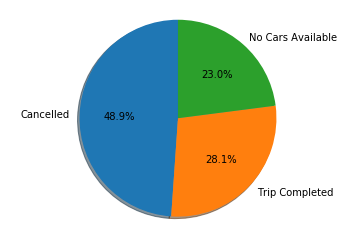

In [123]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Rush where pickup point is City
df_city = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Morning_Rush")]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

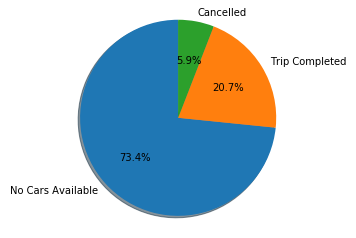

In [124]:
# Status of trips @ Evening Rush where pickup point is Airport
df_airport = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Evening_Rush")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

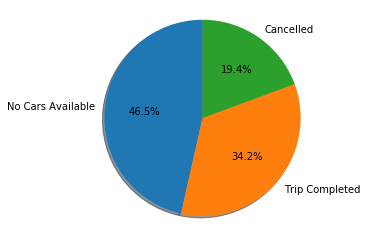

In [149]:
# Status of trips @ Pre Morning where pickup point is City
df_airport = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Pre_Morning")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

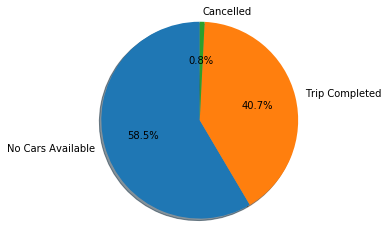

In [150]:
# Status of trips @ Pre Morning where pickup point is Airport
df_airport = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Pre_Morning")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

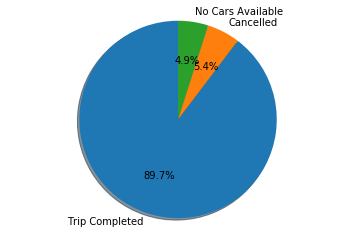

In [151]:
#satus of trips @ Morning Rush where pickup point is Airport
df_airport = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Morning_Rush")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

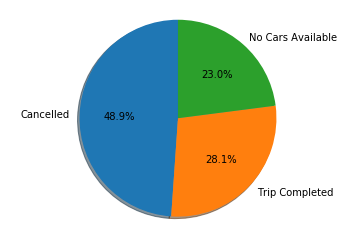

In [152]:
# Status of trips @ Morning Rush where pickup point is City
df_airport = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Morning_Rush")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

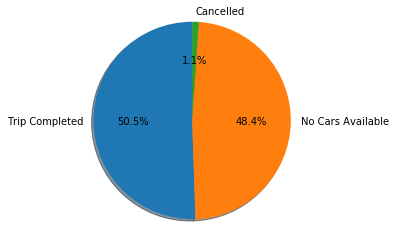

In [153]:
# Status of trips @ Late Night where pickup point is Airport
df_airport = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Late_Night")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

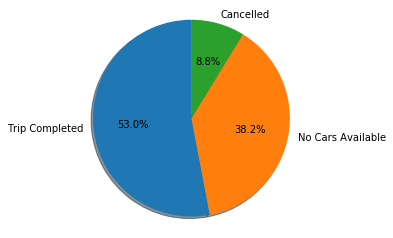

In [154]:
# Status of trips @ Late Night where pickup point is City
df_airport = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Late_Night")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)